In [273]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries

import os

import pprint
import datetime as dt

from sklearn.preprocessing import StandardScaler

In [15]:
ts = TimeSeries(key='AIH485OT2P8QGKIX', output_format = 'pandas')

In [22]:
df = pd.read_csv('fund_comp.csv', header = 0).set_index('company_id')
df1 = pd.read_csv('fund_by_comp.csv', header = 0).set_index('company_id')

In [17]:
#data from http://rankandfiled.com/#/data/hedgefunds
df2 = pd.read_csv('cik_ticker_map.csv',header=0, delimiter = '|').set_index('CIK')

In [ ]:
df2 = pd.read_csv('cik_ticker_map.csv',header=0, delimiter = '|').set_index('CIK')

In [128]:
#df2
df_map = df.join(df2, how='inner')
#df2, only keep whats needed
df_map = df_map[['Ticker','Exchange','SIC']]
#df_map

In [133]:
#df2
df_fund = df1.join(df2, how='inner')
#df2, only keep whats needed
df_fund = df_fund[['indicator_id', 'SIC','Ticker','2010','2011','2012','2013','2014','2015','2016']].reset_index()
df_fund

0             1750
1             1750
2             1750
3             1750
4             1750
5             1750
6             1750
7             1750
8             1750
9             1750
10            1750
11            1750
12            1750
13            1750
14            1750
15            1750
16            1750
17            1750
18            1750
19            1750
20            1750
21            1750
22            1750
23            1750
24            1750
25            1750
26            1750
27            1750
28            1750
29            1750
            ...   
1539080    1590976
1539081    1590976
1539082    1590976
1539083    1590976
1539084    1590976
1539085    1590976
1539086    1590976
1539087    1590976
1539088    1590976
1539089    1590976
1539090    1590976
1539091    1590976
1539092    1590976
1539093    1590976
1539094    1590976
1539095    1590976
1539096    1590976
1539097    1590976
1539098    1590976
1539099    1590976
1539100    1590976
1539101    1

In [46]:
df_fund.describe()
#get some data for the various years/

,SIC,2010,2011,2012,2013,2014,2015,2016
count,1.538911e+06,3.227400e+04,7.017710e+05,9.981090e+05,9.862850e+05,9.441180e+05,8.350970e+05,1.587000e+03
mean,4.843561e+03,1.175327e+09,2.093479e+09,4.841751e+09,2.173781e+09,8.752147e+08,7.881383e+08,2.773091e+08
std,1.961971e+03,6.630701e+10,4.397291e+11,1.863996e+12,6.916106e+11,6.497375e+10,3.223729e+10,1.303021e+09
min,1.000000e+02,-1.461600e+10,-4.489080e+11,-5.611160e+11,-3.761210e+12,-1.470798e+12,-2.490000e+11,-4.311000e+09
25%,3.510000e+03,5.829290e+05,2.000000e+04,1.800000e+04,1.525000e+04,1.649625e+04,1.733400e+04,2.350000e+04
50%,4.931000e+03,2.384800e+07,4.239000e+06,2.433000e+06,2.592500e+06,2.946000e+06,3.425000e+06,1.021700e+07
75%,6.282000e+03,2.057848e+08,5.772700e+07,3.592800e+07,3.838200e+07,4.323288e+07,5.068200e+07,1.057585e+08
max,9.995000e+03,1.183862e+13,2.179510e+14,1.400000e+15,5.000000e+14,2.999726e+13,1.474921e+13,2.621928e+10


In [103]:
df_fund

,indicator_id,SIC,Ticker,2010,2011,2012,2013,2014,2015,2016
1750,AccountsPayableCurrent,3720.0,AIR,1.850960e+08,2.014050e+08,1.493000e+08,1.711000e+08,1.423000e+08,1.634000e+08,NaN
1750,AccountsReceivableNetCurrent,3720.0,AIR,2.874350e+08,3.020560e+08,2.974000e+08,2.831000e+08,2.290000e+08,2.427000e+08,NaN
1750,AccruedLiabilitiesCurrent,3720.0,AIR,1.168390e+08,1.489560e+08,1.533000e+08,1.613000e+08,2.007000e+08,1.536000e+08,NaN
1750,AccumulatedDepreciationDepletionAndAmortizatio...,3720.0,AIR,2.350980e+08,2.984360e+08,3.545000e+08,4.243000e+08,3.985000e+08,4.173000e+08,NaN
1750,AccumulatedOtherComprehensiveIncomeLossNetOfTax,3720.0,AIR,-1.864500e+07,-5.519000e+07,-4.250000e+07,-2.930000e+07,-4.040000e+07,-4.440000e+07,NaN
1750,AdditionalPaidInCapitalCommonStock,3720.0,AIR,4.238050e+08,4.236220e+08,4.316000e+08,4.364000e+08,4.426000e+08,4.513000e+08,NaN
1750,AdditionsToNoncurrentAssets,3720.0,AIR,NaN,9.121800e+07,3.760000e+07,NaN,NaN,NaN,NaN
1750,AdjustmentsToAdditionalPaidInCapitalTaxEffectF...,3720.0,AIR,2.470000e+05,4.820000e+05,NaN,NaN,NaN,NaN,NaN
1750,AmortizationOfDebtDiscountPremium,3720.0,AIR,1.230900e+07,1.317100e+07,9.600000e+06,5.300000e+06,2.700000e+06,NaN,NaN
1750,AmortizationOfIntangibleAssets,3720.0,AIR,NaN,NaN,1.370000e+07,1.040000e+07,4.600000e+06,4.400000e+06,NaN


In [130]:
df_fund.groupby('SIC').count()

,indicator_id,Ticker,2010,2011,2012,2013,2014,2015,2016
SIC,,,,,,,,,
100.0,2851,2851,0,1077,1947,1803,1878,1104,0
200.0,457,457,0,173,305,330,347,318,0
700.0,1128,1128,0,590,786,732,561,472,0
800.0,675,675,0,271,442,364,411,351,0
900.0,580,580,0,289,180,135,237,259,0
1000.0,15216,15216,188,6861,8373,7714,6464,4637,0
1040.0,8250,8250,0,3893,3945,4166,3751,3123,0
1090.0,1134,1134,0,489,556,627,512,545,0
1220.0,1170,1170,0,686,812,625,526,110,0


In [131]:
grouped = df_fund.groupby('indicator_id').count().sort_values(by= ['SIC'], ascending=False)
#a lot of different indicators

group_ind = grouped.index[:25].tolist()
#just keep the top 50 index for now, use to filter out non-important data
group_ind

['LiabilitiesAndStockholdersEquity',
 'Assets',
 'StockholdersEquity',
 'NetIncomeLoss',
 'CashAndCashEquivalentsAtCarryingValue',
 'RetainedEarningsAccumulatedDeficit',
 'CommonStockSharesAuthorized',
 'CashAndCashEquivalentsPeriodIncreaseDecrease',
 'NetCashProvidedByUsedInOperatingActivities',
 'NetCashProvidedByUsedInFinancingActivities',
 'CommonStockValue',
 'CommonStockSharesIssued',
 'PropertyPlantAndEquipmentNet',
 'NetCashProvidedByUsedInInvestingActivities',
 'CommonStockParOrStatedValuePerShare',
 'IncomeTaxExpenseBenefit',
 'CommonStockSharesOutstanding',
 'AssetsCurrent',
 'LiabilitiesCurrent',
 'ShareBasedCompensation',
 'OperatingIncomeLoss',
 'Liabilities',
 'AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment',
 'InterestExpense',
 'WeightedAverageNumberOfSharesOutstandingBasic']

In [125]:
top = grouped[:25]
top

,SIC,Ticker,2010,2011,2012,2013,2014,2015,2016
indicator_id,,,,,,,,,
LiabilitiesAndStockholdersEquity,6670,6673,220,5612,5592,5424,5036,4339,7
Assets,6660,6663,220,5596,5589,5419,5023,4328,7
StockholdersEquity,6404,6407,192,5250,5259,5107,4730,4061,7
NetIncomeLoss,6274,6276,193,5001,5061,4881,4586,3931,6
CashAndCashEquivalentsAtCarryingValue,6252,6254,217,5108,5123,4986,4632,4017,7
RetainedEarningsAccumulatedDeficit,6179,6180,214,4960,4955,4840,4681,4089,7
CommonStockSharesAuthorized,6076,6079,197,5050,5014,4833,4481,3817,6
CashAndCashEquivalentsPeriodIncreaseDecrease,6071,6073,216,4901,4812,4661,4369,3796,6
NetCashProvidedByUsedInOperatingActivities,6001,6004,207,4968,4827,4177,3096,2481,5


In [75]:
#graph the top 25 
import matplotlib.pyplot as plt
import numpy as np

In [150]:
def plot_bar_x():
    # this is for plotting purpose
    label = top.index
    index = np.arange(len(top))
    plt.bar(index, top['SIC'])
    plt.xlabel('Top Features', fontsize=10)
    plt.ylabel('No of Occurance', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=-90)
    plt.title('Top Fundamental Indicators')
    plt.savefig('Top Fundamental Indicators.png')
    plt.show()
    

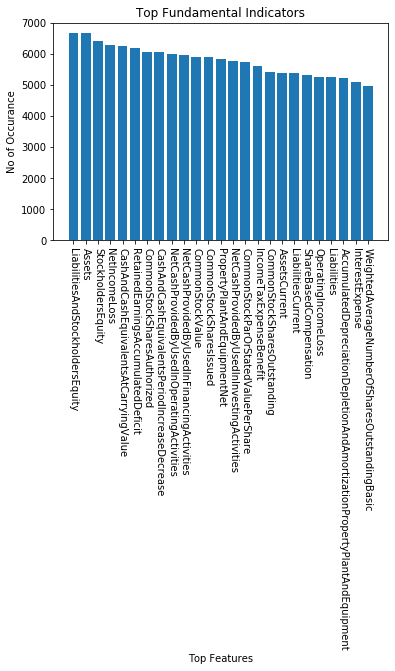

In [152]:
plot_bar_x()
#plt

In [165]:
map_tik = df2['Ticker']

In [194]:
#pivot the indicators for one year and try to figure out what are the most important ones
test_=df_fund.loc[df_fund['indicator_id'].isin(group_ind),['index','indicator_id','2015']]
#use only the ones with all values first
test_ = test_.pivot(index='index',columns='indicator_id', values='2015').dropna()
test_=test_.join(map_tik, how = 'inner')

test_



,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockParOrStatedValuePerShare,CommonStockSharesAuthorized,CommonStockSharesIssued,CommonStockSharesOutstanding,CommonStockValue,...,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,NetIncomeLoss,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,RetainedEarningsAccumulatedDeficit,ShareBasedCompensation,StockholdersEquity,WeightedAverageNumberOfSharesOutstandingBasic,Ticker
8947,1.903680e+08,9.833710e+08,3.093340e+08,4.019100e+07,1.766400e+07,1.000,1.000000e+08,2.587369e+07,2.587369e+07,25874000.0,...,-9.930800e+07,1.435890e+08,7.679000e+07,1.222880e+08,2.263330e+08,4.507540e+08,4538000.0,4.812160e+08,2.580040e+07,AZZ
16099,1.417640e+08,2.642580e+08,1.514800e+07,1.501000e+06,-1.287000e+06,0.320,1.000000e+08,2.913460e+07,2.863460e+07,9323000.0,...,-7.043000e+06,1.031600e+07,-2.074000e+06,-6.360000e+05,1.998590e+08,1.411050e+08,1514000.0,1.746590e+08,2.897400e+07,LUB
26324,5.642700e+08,3.029378e+09,1.316620e+09,2.886970e+08,-1.614190e+08,1.000,1.000000e+08,4.918970e+07,4.462135e+07,49190000.0,...,-1.557600e+07,1.624790e+08,1.454610e+08,3.106170e+08,4.136440e+08,1.590645e+09,9473000.0,1.255423e+09,4.662400e+07,CW
31791,3.279270e+08,4.166295e+09,1.033161e+09,2.379320e+08,6.311100e+07,1.000,3.000000e+08,1.120340e+08,1.120340e+08,112034000.0,...,-1.008560e+08,2.870980e+08,2.124250e+08,2.861340e+08,1.670290e+08,1.991431e+09,17719000.0,2.110441e+09,1.125070e+08,PKI
33185,2.881000e+08,4.509000e+09,5.616000e+08,9.330000e+07,-3.500000e+07,1.250,3.000000e+08,1.893000e+08,1.187000e+08,236600000.0,...,-1.478000e+08,7.421000e+08,4.291000e+08,6.939000e+08,3.668000e+08,3.834400e+09,38400000.0,2.310900e+09,1.187000e+08,EFX
34067,4.852400e+07,1.828660e+08,8.645400e+07,6.291000e+06,-3.109000e+06,0.050,2.500000e+07,1.421212e+07,1.421212e+07,711000.0,...,-5.326000e+06,1.618000e+06,-2.397100e+07,-2.367900e+07,5.799900e+07,8.776700e+07,2826000.0,1.184210e+08,1.393510e+07,BOOM
39020,4.831100e+07,1.202140e+08,8.431100e+07,6.082000e+06,-1.140000e+06,1.000,2.000000e+07,9.164000e+06,8.753000e+06,9164000.0,...,-3.526000e+06,2.923000e+06,1.005000e+06,1.302000e+06,1.307200e+07,2.853300e+07,824000.0,9.335200e+07,8.727874e+06,FEIM
39899,5.258660e+08,8.537758e+09,8.051590e+08,1.292000e+08,1.071600e+07,1.000,8.000000e+08,3.244186e+08,2.200000e+08,324419000.0,...,2.172760e+08,6.131060e+08,4.595220e+08,9.131580e+08,4.583190e+08,7.111129e+09,26344000.0,2.191971e+09,2.246880e+08,GCI
51644,9.619000e+08,1.258510e+10,7.693100e+09,1.502900e+09,-1.577000e+08,0.100,8.000000e+08,4.063000e+08,4.032000e+08,40400000.0,...,-2.028000e+08,6.740000e+08,4.546000e+08,8.719000e+08,5.672000e+08,1.437600e+09,70300000.0,1.965500e+09,4.081000e+08,IPG
59440,1.409910e+08,1.310756e+09,5.837390e+08,2.403680e+08,-8.599700e+07,0.100,2.500000e+08,1.237923e+08,1.237923e+08,12379000.0,...,-2.236300e+07,1.444790e+08,5.919800e+07,1.999200e+08,7.563200e+07,-2.101130e+08,5621000.0,-2.060470e+08,1.177605e+08,VGR


In [195]:
#take 100 to test it out
test_set = set(test_['Ticker'])

In [196]:
def alpha_stocks(symbol, start_date=(2018, 1, 1), end_date=None):

    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    fails = []
    warrants = []
    for i in symbol:
        #if os.path.exists('stock_dfsa/{}.csv'.format(i)):
            #return
        if '.' in i:
            print (i + " is a warrant")
            warrants.append(i)
            ii = i.split('.')[0]
            try:
                data, meta_data = ts.get_daily_adjusted(symbol = ii, outputsize='full')
            except:
                #print (ii + ' is not available')
                fails.append(i)
        else:
            print (i)
            try:
                data, meta_data = ts.get_daily_adjusted(symbol = i, outputsize='full')
            except:
                #print (i + ' is not available')
                fails.append(i)
        if data.empty == False:
            data.columns = ['Open','High','Low','Close','Adj Close','Volume','Dividend','Split']
            data.index.names = ['Date']

            #print (all_data)
            data.to_csv('stock_dfs/{}.csv'.format(i))
            print ("Downloading data for " + i)


In [41]:
amzn = pd.read_csv('stock_dfs/AMZN.csv',header=0, date_parser = True)

In [198]:
#get a list of tickers to download the prices
tickers = test_set
#print ("The number of all stocks is: ")
#print (len(tickers))
alpha_stocks(tickers)
#print(apple_data)
#alpha_stocks(symbol = ['SOHU'])
filenames = os.listdir('stock_dfs')
#print (filenames)

SWM
ADB
DRAD
TRK
LDRH
SPNC
VRS
RSYS
MERC
EFX
MTKN
FES
AKAM
ASNA
VG
LOCK
RLOC
MTSI
ONE
IPG
VNX
CW
RUTH
HL
PII
BOOM
CRM
QLYS
ELLI
BLDR
CNET
MDSO
MHP
FTEK
BRCD
BABY
WDPT
CSGP
MEET
SUPN
SAEX
BID
TALN
HGG
PLXS
BIIB
DLA
STX
RLH
NEON
RAX
NWPX
TTS
HD
SIGA
EEFT
N
NFLX
HNR
TGC
SLCA
ALJ
SHLO
PRSS
ASPN
ORN
HDS
LH
FSI
HBIO
MDCO
ATHN
MDXG
LIME
AMRS
XRAY
NCR
OLN
WDWT
CPN
AHS
SYRG
BECN
ENS
HRT
JCOM
FEIM
STRA
QSII
AGCO
NVDA
DHX
HLT
BCO
ZMTP
LUB
CVV
PPC
ICE
ADES
FTK
TAT
STVS
WMAR
GCI
HYTM
CTSH
FF
PKI
ARC
VRSK
TRS
OME
AOSL
CFX
AIRM
CORE
IGC
AEY
GPOR
XYL
AMKR
PTC
CLUB
TIVO
ADBE
GB
WCG
CGIX
ICFI
NP
OAS
ONNN
CBB
JCOF
RATE
PTSI
EMC
KVHI
TTSR
ABH
SBUX
MLEX
ARKR
PLCM
PBSV
MTOR
NGS
NLS
SPPI
UTI
VCG
FSLR
WYNN
ABCO
WSTC
ANGO
ADT
FIX
VGR
LOJN
SFLY
KALU
NUAN
AYI
CNC
CHUY
SAFY
PDLI
MTX
AZZ
ORA
FOXF
ANGI
KNX
FCEL
TIK
BREW
BFAM
MSCI
CCRN
OIS
BONE
SCKT
NOV
SIRO
CRI
PANL
VAR
EQIX
ROVI
NWMV
RRTS
CIEN
FSS
JBHT
NDLS
MRCY
MALL
TNC
WLP
DFRH
LEOM
EBIX
EXAC
LMT
MGPI
AVX
ABM
CRAY
ALGT
TSCO
ENSG
INSU
['A.csv', 'AA.csv', 'AACC.cs

In [255]:
#initialize a df to remember returns
df_ret = pd.DataFrame(0, index=tickers, columns=['ret'])

In [259]:

for index, row in df_ret.iterrows():
    #print(index,row)
    pd_temp = pd.read_csv('stock_dfs/{}.csv'.format(index),header=0,date_parser = True)
    pd_temp['Date'] = pd_temp['Date'].astype('datetime64[ns]')
    pd_temp['Year'] = pd_temp['Date'].map(lambda x: x.year)
    #print(pd_temp.head())
    avg_2016 = pd_temp[pd_temp['Year'] == 2016]['Adj Close'].mean()
    #print(avg_2016)
    avg_2015 = pd_temp[pd_temp['Year'] == 2015]['Adj Close'].mean()
    #print(avg_2015)
    ret = (avg_2016/avg_2015)-1
    df_ret.loc[index, 'ret'] = ret
    #print(ret)
    #print(row['ret'])


In [260]:
df_ret.sort_values(by=['ret'])
#VXN is very high, discard
df_ret = df_ret[df_ret['ret']<=1]
df_ret

,ret
SWM,-0.043889
ADB,0.787406
DRAD,0.168835
TRK,-0.102235
LDRH,-0.102235
SPNC,-0.102235
VRS,-0.102235
RSYS,-0.102235
MERC,-0.102235
EFX,-0.102235


In [265]:

len(test_)

214

In [252]:

#reset index to ticker so can join
test_ = test_.set_index('Ticker')


In [266]:
df_ret

,ret
SWM,-0.043889
ADB,0.787406
DRAD,0.168835
TRK,-0.102235
LDRH,-0.102235
SPNC,-0.102235
VRS,-0.102235
RSYS,-0.102235
MERC,-0.102235
EFX,-0.102235


In [279]:
df_final = test_.join(df_ret, how = 'inner')

In [291]:
# Separating out the features
x = df_final.loc[:, df_final.columns != 'ret'].values
# Separating out the target
y = df_final.loc[:,['ret']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x
y

array([[ 0.0624157 ],
       [-0.09666342],
       [ 0.20391115],
       [-0.09666342],
       [-0.10223455],
       [-0.09666342],
       [-0.09666342],
       [-0.09666342],
       [-0.10223455],
       [ 0.0624157 ],
       [-0.09666342],
       [-0.09666342],
       [-0.09666342],
       [-0.09666342],
       [-0.09666342],
       [ 0.0624157 ],
       [ 0.0624157 ],
       [ 0.0624157 ],
       [ 0.0624157 ],
       [-0.09666342],
       [ 0.0624157 ],
       [-0.09666342],
       [ 0.0624157 ],
       [ 0.16883537],
       [-0.09666342],
       [ 0.78740577],
       [-0.09666342],
       [ 0.76859153],
       [ 0.0624157 ],
       [-0.09666342],
       [ 0.0624157 ],
       [-0.09666342],
       [-0.09666342],
       [-0.10223455],
       [-0.09666342],
       [-0.09666342],
       [-0.09666342],
       [-0.09666342],
       [ 0.0624157 ],
       [ 0.0624157 ],
       [-0.09666342],
       [-0.09666342],
       [-0.09666342],
       [-0.09666342],
       [-0.09666342],
       [-0

In [289]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.113081,0.409537
1,-1.463440,0.079634
2,-0.410821,0.478366
3,-0.048402,0.381515
4,0.754254,0.123099
5,-1.589423,0.052374
6,-1.518761,0.420372
7,2.031705,-0.273465
8,3.215453,0.408242
9,-0.712150,-0.319184


In [294]:
df_finall = df_final.reset_index()
df_finall

,index,AccumulatedDepreciationDepletionAndAmortizationPropertyPlantAndEquipment,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockParOrStatedValuePerShare,CommonStockSharesAuthorized,CommonStockSharesIssued,CommonStockSharesOutstanding,...,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,NetIncomeLoss,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,RetainedEarningsAccumulatedDeficit,ShareBasedCompensation,StockholdersEquity,WeightedAverageNumberOfSharesOutstandingBasic,ret
0,AZZ,1.903680e+08,9.833710e+08,3.093340e+08,4.019100e+07,1.766400e+07,1.000,1.000000e+08,2.587369e+07,2.587369e+07,...,-9.930800e+07,1.435890e+08,7.679000e+07,1.222880e+08,2.263330e+08,4.507540e+08,4538000.0,4.812160e+08,2.580040e+07,0.062416
1,LUB,1.417640e+08,2.642580e+08,1.514800e+07,1.501000e+06,-1.287000e+06,0.320,1.000000e+08,2.913460e+07,2.863460e+07,...,-7.043000e+06,1.031600e+07,-2.074000e+06,-6.360000e+05,1.998590e+08,1.411050e+08,1514000.0,1.746590e+08,2.897400e+07,-0.096663
2,CW,5.642700e+08,3.029378e+09,1.316620e+09,2.886970e+08,-1.614190e+08,1.000,1.000000e+08,4.918970e+07,4.462135e+07,...,-1.557600e+07,1.624790e+08,1.454610e+08,3.106170e+08,4.136440e+08,1.590645e+09,9473000.0,1.255423e+09,4.662400e+07,0.203911
3,PKI,3.279270e+08,4.166295e+09,1.033161e+09,2.379320e+08,6.311100e+07,1.000,3.000000e+08,1.120340e+08,1.120340e+08,...,-1.008560e+08,2.870980e+08,2.124250e+08,2.861340e+08,1.670290e+08,1.991431e+09,17719000.0,2.110441e+09,1.125070e+08,-0.096663
4,EFX,2.881000e+08,4.509000e+09,5.616000e+08,9.330000e+07,-3.500000e+07,1.250,3.000000e+08,1.893000e+08,1.187000e+08,...,-1.478000e+08,7.421000e+08,4.291000e+08,6.939000e+08,3.668000e+08,3.834400e+09,38400000.0,2.310900e+09,1.187000e+08,-0.102235
5,BOOM,4.852400e+07,1.828660e+08,8.645400e+07,6.291000e+06,-3.109000e+06,0.050,2.500000e+07,1.421212e+07,1.421212e+07,...,-5.326000e+06,1.618000e+06,-2.397100e+07,-2.367900e+07,5.799900e+07,8.776700e+07,2826000.0,1.184210e+08,1.393510e+07,-0.096663
6,FEIM,4.831100e+07,1.202140e+08,8.431100e+07,6.082000e+06,-1.140000e+06,1.000,2.000000e+07,9.164000e+06,8.753000e+06,...,-3.526000e+06,2.923000e+06,1.005000e+06,1.302000e+06,1.307200e+07,2.853300e+07,824000.0,9.335200e+07,8.727874e+06,-0.096663
7,GCI,5.258660e+08,8.537758e+09,8.051590e+08,1.292000e+08,1.071600e+07,1.000,8.000000e+08,3.244186e+08,2.200000e+08,...,2.172760e+08,6.131060e+08,4.595220e+08,9.131580e+08,4.583190e+08,7.111129e+09,26344000.0,2.191971e+09,2.246880e+08,-0.096663
8,IPG,9.619000e+08,1.258510e+10,7.693100e+09,1.502900e+09,-1.577000e+08,0.100,8.000000e+08,4.063000e+08,4.032000e+08,...,-2.028000e+08,6.740000e+08,4.546000e+08,8.719000e+08,5.672000e+08,1.437600e+09,70300000.0,1.965500e+09,4.081000e+08,-0.102235
9,VGR,1.409910e+08,1.310756e+09,5.837390e+08,2.403680e+08,-8.599700e+07,0.100,2.500000e+08,1.237923e+08,1.237923e+08,...,-2.236300e+07,1.444790e+08,5.919800e+07,1.999200e+08,7.563200e+07,-2.101130e+08,5621000.0,-2.060470e+08,1.177605e+08,0.062416


In [295]:
df_final = df_final.reset_index()
finalDf = pd.concat([principalDf, df_finall[['ret']]], axis = 1)
finalDf

,principal component 1,principal component 2,ret
0,-1.113081,0.409537,0.062416
1,-1.463440,0.079634,-0.096663
2,-0.410821,0.478366,0.203911
3,-0.048402,0.381515,-0.096663
4,0.754254,0.123099,-0.102235
5,-1.589423,0.052374,-0.096663
6,-1.518761,0.420372,-0.096663
7,2.031705,-0.273465,-0.096663
8,3.215453,0.408242,-0.102235
9,-0.712150,-0.319184,0.062416


In [302]:
from sklearn.decomposition.pca import PCA
#explained variance
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

[52.27 63.37]


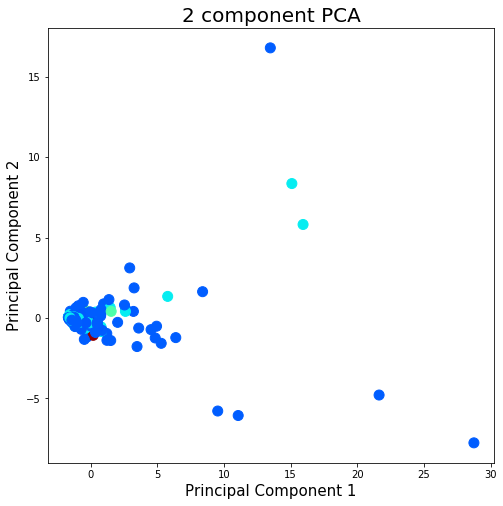

In [310]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
jet=plt.get_cmap('jet')
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], s=100, c=finalDf['ret'], cmap=jet)